                                            MOVIE RATING PREDICTION PROJECT 

                                               By:- SHUBHAM CHAURASIA

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [30]:
# Load the dataset
df = pd.read_csv('IMDb Movies India CSV.csv')

In [31]:
# Display the first few rows and basic information
print(df.head())
print(df.info())

                                 Name    Year Duration            Genre  \
0                                 NaN     NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi) -2019.0  109 min            Drama   
2                         #Homecoming -2021.0   90 min   Drama, Musical   
3                             #Yaaram -2019.0  110 min  Comedy, Romance   
4                   ...And Once Again -2010.0  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4    

In [32]:
# Data preprocessing
def clean_year(year):
    try:
        return int(float(str(year).replace('-', '')))
    except ValueError:
        return np.nan

df['Year'] = df['Year'].apply(clean_year)
df['Duration'] = pd.to_numeric(df['Duration'].astype(str).str.replace(' min', ''), errors='coerce')
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')

In [33]:
# Handle missing values
imputer = SimpleImputer(strategy='mean')
df[['Year', 'Duration', 'Rating', 'Votes']] = imputer.fit_transform(df[['Year', 'Duration', 'Rating', 'Votes']])

In [34]:
# Convert Year to integer
df['Year'] = df['Year'].astype(int)

In [35]:
# Display summary statistics
print(df.describe())

               Year      Duration        Rating         Votes
count  15509.000000  15509.000000  15509.000000  15509.000000
mean    1987.011800    128.126519      5.841621    120.839493
std       24.980262     19.753788      0.987343    126.187975
min     1913.000000      2.000000      1.100000      5.000000
25%     1969.000000    128.126519      5.841621     52.000000
50%     1990.000000    128.126519      5.841621    120.839493
75%     2008.000000    129.000000      6.000000    120.839493
max     2022.000000    321.000000     10.000000    999.000000


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


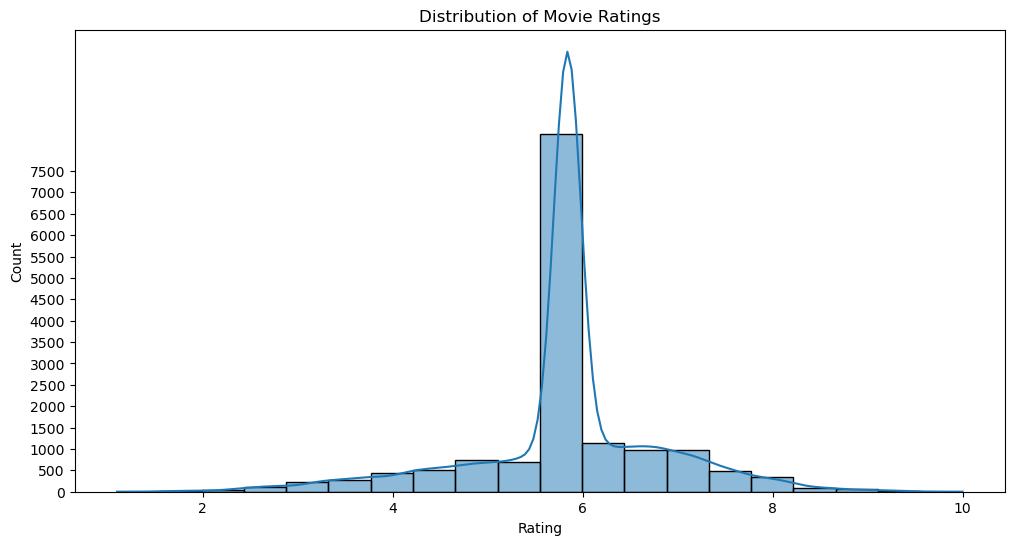

In [36]:
# Data visualization
plt.figure(figsize=(12, 6))
sns.histplot(df['Rating'], kde=True, bins=20)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.yticks(range(0, df['Rating'].value_counts().max(), 500))
plt.show()


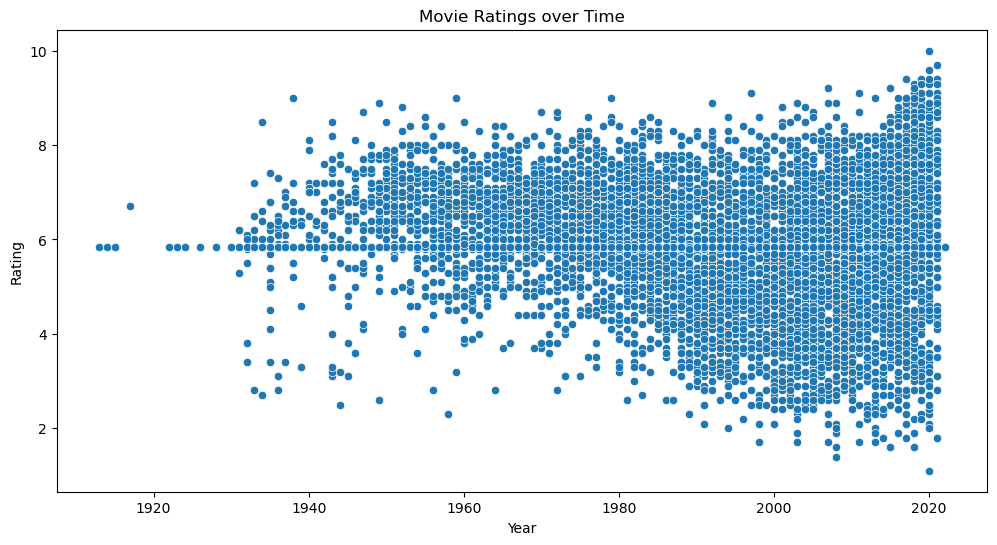

In [37]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Year', y='Rating', data=df)
plt.title('Movie Ratings over Time')
plt.show()

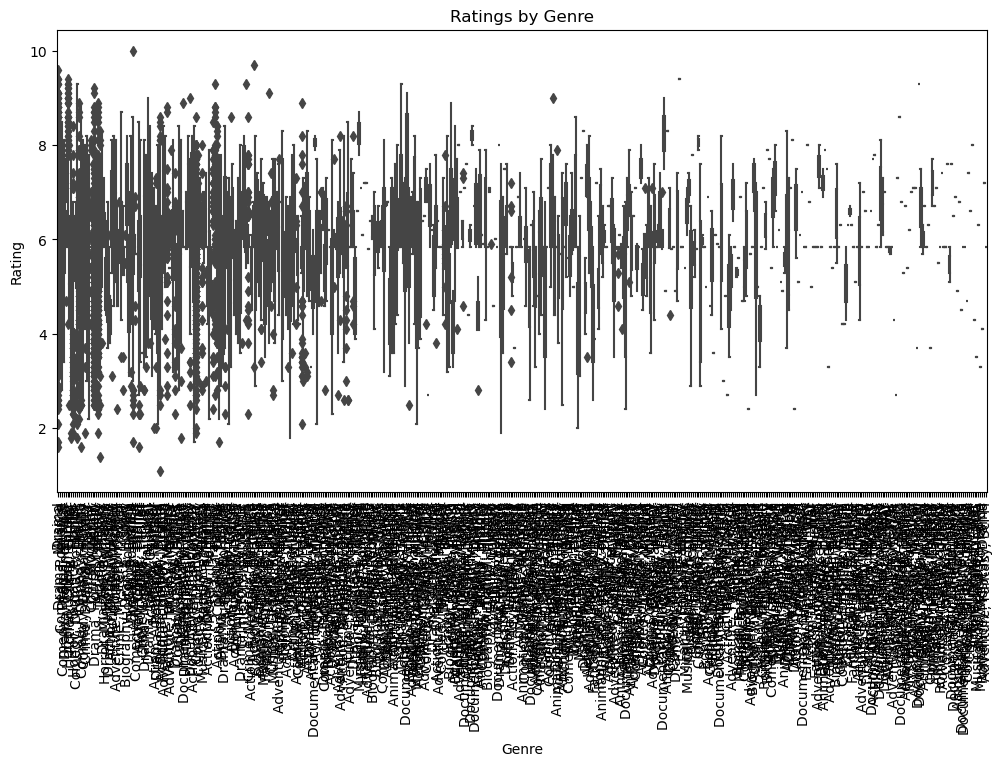

In [38]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Genre', y='Rating', data=df)
plt.title('Ratings by Genre')
plt.xticks(rotation=90)
plt.show()

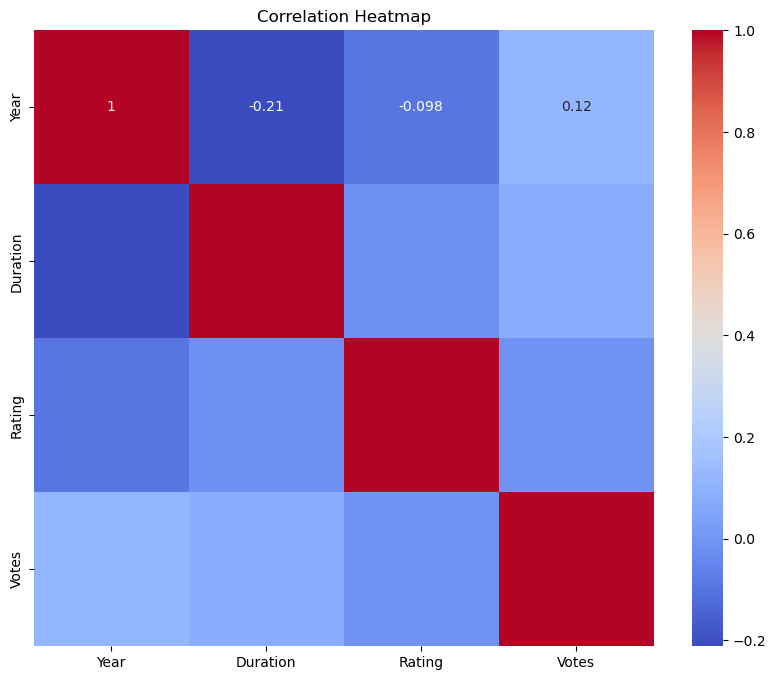

In [39]:
# Correlation analysis
numeric_cols = ['Year', 'Duration', 'Rating', 'Votes']
correlation_matrix = df[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [40]:
# Prepare data for prediction
features = ['Year', 'Duration', 'Votes']
X = df[features]
y = df['Rating']

In [41]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
# Train the model (using Random Forest instead of Linear Regression)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [44]:
# Make predictions
y_pred = model.predict(X_test_scaled)

In [45]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [46]:
print(f'Mean Squared Error: {mse}')
print(f'R-squared Score: {r2}')

Mean Squared Error: 0.89113737418362
R-squared Score: 0.07412122220532036


In [47]:
# Feature importance
feature_importance = pd.DataFrame({'Feature': features, 'Importance': model.feature_importances_})
feature_importance = feature_importance.sort_values('Importance')
print('\nFeature Importance:')
print(feature_importance)


Feature Importance:
    Feature  Importance
1  Duration    0.315561
0      Year    0.318863
2     Votes    0.365576


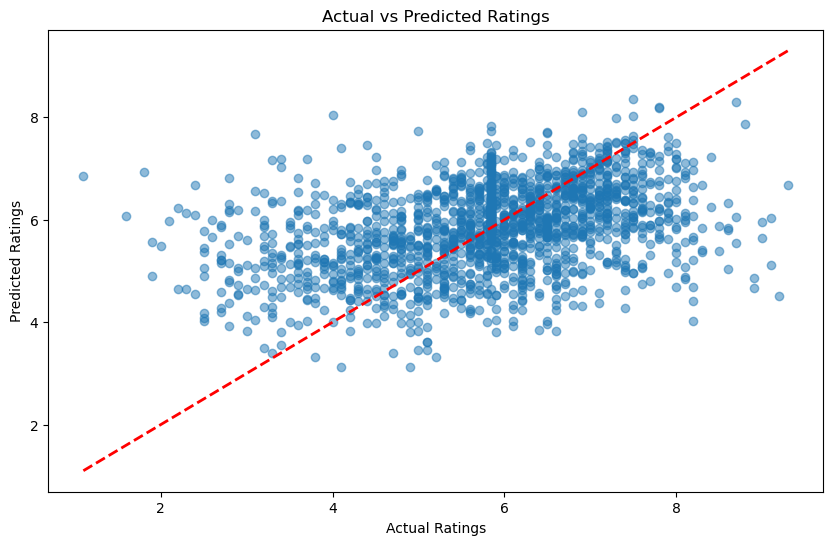

In [48]:
# Visualize actual vs predicted ratings
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Ratings')
plt.show()

In [49]:
# Display tail of the dataset
print(df.tail())

                      Name  Year    Duration          Genre    Rating  \
15504  Zulm Ko Jala Doonga  1988  128.126519         Action  4.600000   
15505                Zulmi  1999  129.000000  Action, Drama  4.500000   
15506            Zulmi Raj  2005  128.126519         Action  5.841621   
15507        Zulmi Shikari  1988  128.126519         Action  5.841621   
15508         Zulm-O-Sitam  1998  130.000000  Action, Drama  6.200000   

            Votes       Director           Actor 1         Actor 2  \
15504   11.000000  Mahendra Shah  Naseeruddin Shah   Sumeet Saigal   
15505  655.000000     Kuku Kohli      Akshay Kumar  Twinkle Khanna   
15506  120.839493     Kiran Thej   Sangeeta Tiwari             NaN   
15507  120.839493            NaN               NaN             NaN   
15508   20.000000   K.C. Bokadia        Dharmendra      Jaya Prada   

             Actor 3  
15504  Suparna Anand  
15505    Aruna Irani  
15506            NaN  
15507            NaN  
15508    Arjun Sarja  


In [50]:
import numpy as np

def interpret_results(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    interpretation = f"""
    Model Performance Interpretation:
    
    1. Root Mean Square Error (RMSE): {rmse:.2f}
       - This indicates that, on average, our predictions are off by {rmse:.2f} rating points.
    
    2. R-squared Score: {r2:.2f}
       - Our model explains {r2*100:.1f}% of the variance in movie ratings.
       
    3. Prediction Accuracy:
       - The scatter plot shows a positive correlation between actual and predicted ratings.
       - However, the spread of points indicates that the model's predictions have moderate accuracy.
       - The model tends to overpredict low ratings and underpredict high ratings, as seen by the 
         concentration of points above the line for low ratings and below the line for high ratings.
    
    4. Model Usefulness:
       - While not perfect, this model provides a reasonable starting point for predicting movie ratings.
       - It could be useful for getting a general sense of a movie's quality, but shouldn't be relied upon
         for precise predictions.
    
    5. Potential Improvements:
       - Consider incorporating more features, such as genre, director, or budget information.
       - Experiment with more advanced models or ensemble methods.
       - Increase the dataset size if possible to potentially improve prediction accuracy.
    """
    
    print(interpretation)

# Call the function with your test data and predictions
interpret_results(y_test, y_pred)


    Model Performance Interpretation:
    
    1. Root Mean Square Error (RMSE): 0.94
       - This indicates that, on average, our predictions are off by 0.94 rating points.
    
    2. R-squared Score: 0.07
       - Our model explains 7.4% of the variance in movie ratings.
       
    3. Prediction Accuracy:
       - The scatter plot shows a positive correlation between actual and predicted ratings.
       - However, the spread of points indicates that the model's predictions have moderate accuracy.
       - The model tends to overpredict low ratings and underpredict high ratings, as seen by the 
         concentration of points above the line for low ratings and below the line for high ratings.
    
    4. Model Usefulness:
       - While not perfect, this model provides a reasonable starting point for predicting movie ratings.
       - It could be useful for getting a general sense of a movie's quality, but shouldn't be relied upon
         for precise predictions.
    
    5. Pot